In [1]:
import numpy as np, healpy as hp, pickle, prjlib, curvedsky, plottools as pl
from matplotlib.pyplot import *

In [27]:
Lmax = 4096
lmax = 2048
l = np.linspace(0,lmax,lmax+1)
L = np.linspace(0,Lmax,Lmax+1)
pla, fla, rla = prjlib.analysis_init(t='la',freq='coadd',lmax=Lmax)
pid, fid, rid = prjlib.analysis_init(t='id',freq='145',ntype='cv')
psa, fsa, rsa = prjlib.analysis_init(t='sa',freq='coadd',lmax=lmax)
pco, fco, rco = prjlib.analysis_init(t='co',freq='coadd',lmax=lmax)
lcut = 2048

In [3]:
Wla, w2, w4 = prjlib.window(fla.cmb.mask)
Wsa, w2, w4 = prjlib.window(fsa.cmb.mask)
Msa = Wsa/(Wsa+1e-30)
wla = hp.pixelfunc.ud_grade(Wla,psa.nside)
Mla = wla/(wla+1e-30)
iW = Wsa*Mla/(wla+1e-30)

0.046519878502273154 0.00878600382491057
0.039673498593158225 0.01720146136530704


In [4]:
W2 = 1.-np.average(Mla*Msa)
print(W2)

0.6579627990722656


In [5]:
vmin, vmax = -1e-6, 1e-6
#vmin, vmax = -2e-7, 2e-7

Temperature

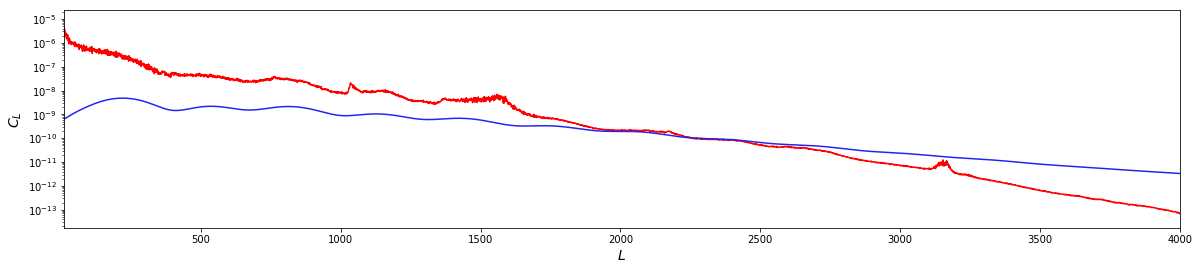

In [40]:
Talm = pickle.load(open(fla.cmb.ialm['T'][12],"rb"))
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ylog=True)
cl0 = curvedsky.utils.alm2cl(Lmax,Talm)
plot(L,L**2*cl0/W2*rla.lcl[0,:]**2,color='r')
plot(L,L**2*rla.lcl[0,:])
#T = curvedsky.utils.hp_alm2map(pla.npix,lmax,lmax,Talm0)
#hp.mollview(T,min=vmin,max=vmax)

Polarization

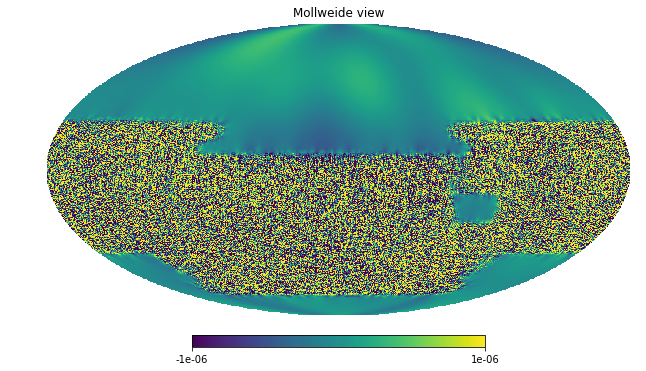

In [29]:
Ealm0 = pickle.load(open(fco.cmb.walm['E'][12],"rb"))
Balm0 = pickle.load(open(fco.cmb.walm['B'][12],"rb"))
Q, U = curvedsky.utils.hp_alm2map_spin(psa.npix,lmax,lmax,2,Ealm0,0*Ealm0)
hp.mollview(Q,min=vmin,max=vmax)

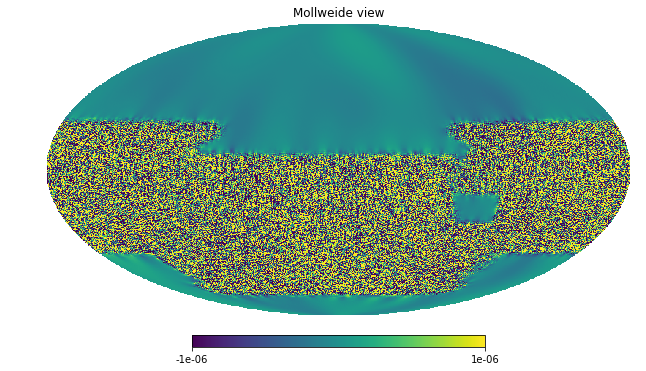

In [30]:
Ealm1 = pickle.load(open(fco.cmb.walm['E'][1],"rb"))
Balm1 = pickle.load(open(fco.cmb.walm['B'][1],"rb"))
Q, U = curvedsky.utils.hp_alm2map_spin(psa.npix,lmax,lmax,2,Ealm1,0*Ealm1)
hp.mollview(Q,min=vmin,max=vmax)

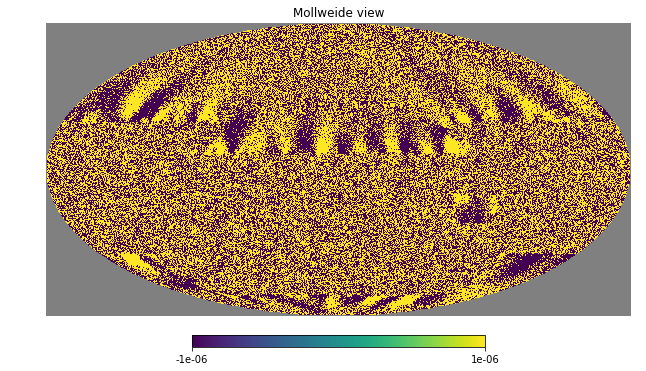

In [31]:
Ealm = pickle.load(open(fla.cmb.ialm['E'][1],"rb"))
Balm = pickle.load(open(fla.cmb.ialm['B'][1],"rb"))
Q, U = curvedsky.utils.hp_alm2map_spin(psa.npix,Lmax,Lmax,2,Ealm,0*Ealm)
hp.mollview(Q,min=vmin,max=vmax)

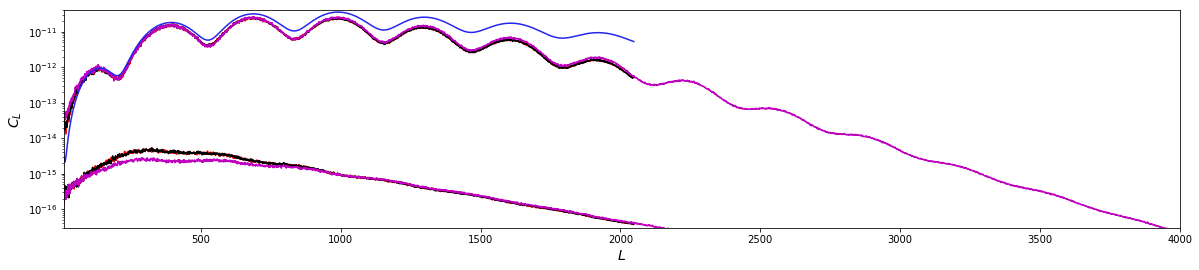

In [36]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-17,ymax=4e-11,ylog=True)
cl0 = curvedsky.utils.alm2cl(lmax,Ealm0)
cl1 = curvedsky.utils.alm2cl(lmax,Ealm1)
cl2 = curvedsky.utils.alm2cl(Lmax,Ealm)
bl0 = curvedsky.utils.alm2cl(lmax,Balm0)
bl1 = curvedsky.utils.alm2cl(lmax,Balm1)
bl2 = curvedsky.utils.alm2cl(Lmax,Balm)
plot(l,l**2*cl0/W2,color='r')
plot(l,l**2*cl1/W2,color='k')
plot(L,L**2*cl2/W2*rla.lcl[1,:]**2,color='m')
plot(l,l**2*bl0/W2,color='r')
plot(l,l**2*bl1/W2,color='k')
plot(L,L**2*bl2/W2*rla.lcl[2,:]**2,color='m')
plot(l,l**2*rco.lcl[1,:])